# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [1]:
# making an API call
# import requests

from requests import get

api_endpoint = 'https://pokeapi.co/api/v2/pokemon'


#get(endpoint, )
#status 404 = bad request, status 200 = good request / ok
response = get(f'{api_endpoint}/psyduck')

print(response)

#checking response
print(response.status_code)

#T/F for good response
print(response.ok) #check to make sure it is ok

#Throw 404 error for bad response
print(response.raise_for_status()) 
# raise_for_status() method is called on the response object, 
# which will raise an exception if the response status code indicates an error.




<Response [200]>
200
True
None


In [2]:
#getting data

if response.ok: #conditional to check if the reponse is ok. If it is, it will return the data, if not, it will
    #break the program, but inform the user that there was an error (a bad request).
    print(response.json())
    data = response.json()
else:
    print("bad request. Enter valid pokemon")

{'abilities': [{'ability': {'name': 'damp', 'url': 'https://pokeapi.co/api/v2/ability/6/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'cloud-nine', 'url': 'https://pokeapi.co/api/v2/ability/13/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'swift-swim', 'url': 'https://pokeapi.co/api/v2/ability/33/'}, 'is_hidden': True, 'slot': 3}], 'base_experience': 64, 'forms': [{'name': 'psyduck', 'url': 'https://pokeapi.co/api/v2/pokemon-form/54/'}], 'game_indices': [{'game_index': 47, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 47, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 47, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 54, 'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}}, {'game_index': 54, 'version': {'name': 'silver', 'url': 'https://pokeapi.co/api/v2/version/5/'}}, {'game_index': 54, 'version': {'name

In [3]:
# 200 OK: The request was successful, and the server has returned the requested resource.

# 201 Created: A new resource has been successfully created as a result of the request.

# 400 Bad Request: The server could not understand the request due to malformed syntax or invalid parameters.

# 401 Unauthorized: Authentication is required, and the request lacks valid credentials.

# 403 Forbidden: The server understood the request, but the client does not have permission to access the requested resource.

# 404 Not Found: The requested resource could not be found on the server.

# 500 Internal Server Error: An unexpected error occurred on the server while processing the request.

### Display a Pokemon's name, weight, abilities, and types

In [4]:
# get the name
data['name']

'psyduck'

In [5]:
# get types
data['types']

# types = data['types'] #we could even store it as a varaiable.

[{'slot': 1,
  'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]

In [6]:
# get weight

weight = data['weight']

weight

196

In [7]:
# get abilities
abilities = data['abilities'] #again, this step here is not necessary. We are just giving a variable.
#we could just as well simply do data['abilities'] and it would call the same info.

abilities

[{'ability': {'name': 'damp', 'url': 'https://pokeapi.co/api/v2/ability/6/'},
  'is_hidden': False,
  'slot': 1},
 {'ability': {'name': 'cloud-nine',
   'url': 'https://pokeapi.co/api/v2/ability/13/'},
  'is_hidden': False,
  'slot': 2},
 {'ability': {'name': 'swift-swim',
   'url': 'https://pokeapi.co/api/v2/ability/33/'},
  'is_hidden': True,
  'slot': 3}]

In [8]:
# Create a structure for a single pokemon
pokemon = {
    "name": data['name'],
    "weight": data['weight'],
    "abilities": data['abilities'],
    "types": data['types']
}

print(pokemon)

for k, v in pokemon.items(): #.items gives us keys and values
    print(f'{k}: {v}')

{'name': 'psyduck', 'weight': 196, 'abilities': [{'ability': {'name': 'damp', 'url': 'https://pokeapi.co/api/v2/ability/6/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'cloud-nine', 'url': 'https://pokeapi.co/api/v2/ability/13/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'swift-swim', 'url': 'https://pokeapi.co/api/v2/ability/33/'}, 'is_hidden': True, 'slot': 3}], 'types': [{'slot': 1, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]}
name: psyduck
weight: 196
abilities: [{'ability': {'name': 'damp', 'url': 'https://pokeapi.co/api/v2/ability/6/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'cloud-nine', 'url': 'https://pokeapi.co/api/v2/ability/13/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'swift-swim', 'url': 'https://pokeapi.co/api/v2/ability/33/'}, 'is_hidden': True, 'slot': 3}]
types: [{'slot': 1, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]


#### Create a function to Pull in your own Pokemon's data 

In [9]:
def poke_api_call(pokemon):
    api_endpoint = f'https://pokeapi.co/api/v2/pokemon/{pokemon}'
    res = get(api_endpoint)
    
    #now check to make sure we made a good request
    if res.ok:
        data = res.json()
        poke_dict = {
            "name": data['name'],
            "weight": data['weight'],
            "abilities": data['abilities'],
            "types": data['types']
        }
        return poke_dict #if the if has a return statement, no need to put an else statement.
    return('Invalid Input, pass in proper pokemon') #this will only trigger if our if statement returns false
    
print(poke_api_call('pikachu'))

print(poke_api_call('pikachuad'))

print(poke_api_call('hitmonlee'))

print(poke_api_call('kadabra'))

{'name': 'pikachu', 'weight': 60, 'abilities': [{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'lightning-rod', 'url': 'https://pokeapi.co/api/v2/ability/31/'}, 'is_hidden': True, 'slot': 3}], 'types': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}]}
Invalid Input, pass in proper pokemon
{'name': 'hitmonlee', 'weight': 498, 'abilities': [{'ability': {'name': 'limber', 'url': 'https://pokeapi.co/api/v2/ability/7/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'reckless', 'url': 'https://pokeapi.co/api/v2/ability/120/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'unburden', 'url': 'https://pokeapi.co/api/v2/ability/84/'}, 'is_hidden': True, 'slot': 3}], 'types': [{'slot': 1, 'type': {'name': 'fighting', 'url': 'https://pokeapi.co/api/v2/type/2/'}}]}
{'name': 'kadabra', 'weight': 565, 'abilities': [{'ability': {'name': 'synchronize', 'url': 'htt

In [10]:
def get_poke_data(pokemon):
    api_endpoint = f'https://pokeapi.co/api/v2/pokemon/{pokemon}'
    res = get(api_endpoint)
    
    #now check to make sure we made a good request
    if res.ok:
        data = res.json()
        return {k:data[k] for k in ['name', 'weight', 'abilities', 'types']}
    return('Invalid Input, pass in proper pokemon') #this will only trigger if our if statement returns false

print(get_poke_data('abra'))

#dict generator
#{<k>:<v> for item in iterable}

{'name': 'abra', 'weight': 195, 'abilities': [{'ability': {'name': 'synchronize', 'url': 'https://pokeapi.co/api/v2/ability/28/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'inner-focus', 'url': 'https://pokeapi.co/api/v2/ability/39/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'magic-guard', 'url': 'https://pokeapi.co/api/v2/ability/98/'}, 'is_hidden': True, 'slot': 3}], 'types': [{'slot': 1, 'type': {'name': 'psychic', 'url': 'https://pokeapi.co/api/v2/type/14/'}}]}


Choose your pokemon

In [11]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)] #storing in six items as we randomly loop through the range 1-898

print(random_team)
your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']




[6, 767, 500, 632, 681, 729]


In [12]:
your_team_dict = {pokemon:get_poke_data(pokemon) for pokemon in your_team}
print(len(your_team_dict))

your_team_dict

6


{'electabuzz': {'name': 'electabuzz',
  'weight': 300,
  'abilities': [{'ability': {'name': 'static',
     'url': 'https://pokeapi.co/api/v2/ability/9/'},
    'is_hidden': False,
    'slot': 1},
   {'ability': {'name': 'vital-spirit',
     'url': 'https://pokeapi.co/api/v2/ability/72/'},
    'is_hidden': True,
    'slot': 3}],
  'types': [{'slot': 1,
    'type': {'name': 'electric',
     'url': 'https://pokeapi.co/api/v2/type/13/'}}]},
 'haunter': {'name': 'haunter',
  'weight': 1,
  'abilities': [{'ability': {'name': 'levitate',
     'url': 'https://pokeapi.co/api/v2/ability/26/'},
    'is_hidden': False,
    'slot': 1}],
  'types': [{'slot': 1,
    'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}},
   {'slot': 2,
    'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}]},
 'tyranitar': {'name': 'tyranitar',
  'weight': 2020,
  'abilities': [{'ability': {'name': 'sand-stream',
     'url': 'https://pokeapi.co/api/v2/ability/45/'},
    'is_hidden'

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [13]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for poke_index in random_team:
    print(f'{poke_index = }')
    poke_data = get_poke_data(poke_index)
    print(poke_data)
    my_six_pokemon[poke_data['name']] = poke_data
    
my_six_pokemon


poke_index = 6
{'name': 'charizard', 'weight': 905, 'abilities': [{'ability': {'name': 'blaze', 'url': 'https://pokeapi.co/api/v2/ability/66/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'solar-power', 'url': 'https://pokeapi.co/api/v2/ability/94/'}, 'is_hidden': True, 'slot': 3}], 'types': [{'slot': 1, 'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}}, {'slot': 2, 'type': {'name': 'flying', 'url': 'https://pokeapi.co/api/v2/type/3/'}}]}
poke_index = 767
{'name': 'wimpod', 'weight': 120, 'abilities': [{'ability': {'name': 'wimp-out', 'url': 'https://pokeapi.co/api/v2/ability/193/'}, 'is_hidden': False, 'slot': 1}], 'types': [{'slot': 1, 'type': {'name': 'bug', 'url': 'https://pokeapi.co/api/v2/type/7/'}}, {'slot': 2, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]}
poke_index = 500
{'name': 'emboar', 'weight': 1500, 'abilities': [{'ability': {'name': 'blaze', 'url': 'https://pokeapi.co/api/v2/ability/66/'}, 'is_hidden': False, 's

{'charizard': {'name': 'charizard',
  'weight': 905,
  'abilities': [{'ability': {'name': 'blaze',
     'url': 'https://pokeapi.co/api/v2/ability/66/'},
    'is_hidden': False,
    'slot': 1},
   {'ability': {'name': 'solar-power',
     'url': 'https://pokeapi.co/api/v2/ability/94/'},
    'is_hidden': True,
    'slot': 3}],
  'types': [{'slot': 1,
    'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}},
   {'slot': 2,
    'type': {'name': 'flying', 'url': 'https://pokeapi.co/api/v2/type/3/'}}]},
 'wimpod': {'name': 'wimpod',
  'weight': 120,
  'abilities': [{'ability': {'name': 'wimp-out',
     'url': 'https://pokeapi.co/api/v2/ability/193/'},
    'is_hidden': False,
    'slot': 1}],
  'types': [{'slot': 1,
    'type': {'name': 'bug', 'url': 'https://pokeapi.co/api/v2/type/7/'}},
   {'slot': 2,
    'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]},
 'emboar': {'name': 'emboar',
  'weight': 1500,
  'abilities': [{'ability': {'name': 'blaze',
  

In [14]:
# Display an image in Jupyter notebook
from IPython.display import Image

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))

## Lets create a class called 'Pokemon' and create our pokemon as instances

<Pokemon: psyduck>
196
[{'slot': 1, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]


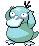

psyduck Weight: 196
Types:  water 
Abilities:  damp
cloud-nine
swift-swim


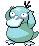

In [15]:
class Pokemon:
    
    def __init__(self, name): #execute on its own. Primary to assign/collect attributes
        self.name = name
        self.abilities = []
        self.weight = None
        self.types = []
        self.image = ''
        self.pokemon_api_call()#we can call it here so that it runs immedatly. calling a method w/in init
        
    def pokemon_api_call(self): #dont need to pull a name since it will have already been called in the previous
        res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if res.ok:
            data = res.json() #convert to json format
            self.name = data['name']
            self.abilities = data['abilities']
            self.weight = data['weight']
            self.types = data['types']
            self.image=data['sprites']['versions']['generation-v']['black-white']['animated']['front_shiny']
            if not self.image:
                self.image = data['sprites']['front_default']
            
        else:
            print(f'Error: status code {res.status_code}')
            
    def __repr__(self): #the output when we call the instance (a string representation of what our instance is)
        return f'<Pokemon: {self.name}>'
    
    def display_pokemon_info(self):
        print(f'{self.name} Weight: {self.weight}')
        print('Types: ', end=" ") #this end overrides the newline default, saying that whatever comes next will
        #be on the same line with a space between.
        for poke_type in self.types:
            print(poke_type['type']['name'], end= ' ')
        print('\nAbilities: ', end=" ")
        for ability in self.abilities:
            print(ability['ability']['name'])
        self.display_image()
            
    
    def display_image(self, width=150):
        display(Image(self.image, width = width))

            


psyduck = Pokemon('psyduck')

print(psyduck)
print(psyduck.weight)
print(psyduck.types)

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))
psyduck.display_image()
psyduck.display_pokemon_info()

### Let's Catch some Pokemon

In [16]:
pokedex = {}

catching_pokemon = True

while catching_pokemon:
    pokemon_input = input('What pokemon are you catching? or Done? ').lower()
    if pokemon_input == 'done':
        catching_pokemon = False
    pokemon = Pokemon(pokemon_input)
    if pokemon.abilities and pokemon not in pokedex: #only adding to our list if it is a good request and 
#         if it is not in there already
        pokedex[pokemon_input] = pokemon
    else:
        print('Please you correct poke name')
        
    print(pokedex)
    

What pokemon are you catching? or Done? abra
{'abra': <Pokemon: abra>}
What pokemon are you catching? or Done? machamp
{'abra': <Pokemon: abra>, 'machamp': <Pokemon: machamp>}
What pokemon are you catching? or Done? snorlax
{'abra': <Pokemon: abra>, 'machamp': <Pokemon: machamp>, 'snorlax': <Pokemon: snorlax>}
What pokemon are you catching? or Done? drowzee
{'abra': <Pokemon: abra>, 'machamp': <Pokemon: machamp>, 'snorlax': <Pokemon: snorlax>, 'drowzee': <Pokemon: drowzee>}
What pokemon are you catching? or Done? done
Error: status code 404
Please you correct poke name
{'abra': <Pokemon: abra>, 'machamp': <Pokemon: machamp>, 'snorlax': <Pokemon: snorlax>, 'drowzee': <Pokemon: drowzee>}


Are you still building your team? [y]es/[n]o? y
What pokemon are we adding?  hypno
Are you still building your team? [y]es/[n]o? alakazam
Are you still building your team? [y]es/[n]o? u
Are you still building your team? [y]es/[n]o? y
What pokemon are we adding?  alakazam
Are you still building your team? [y]es/[n]o? y
What pokemon are we adding?  gengar
Are you still building your team? [y]es/[n]o? n


sean's Collection: 
hypno: <Pokemon: hypno>
hypno Weight: 756
Types:  psychic 
Abilities:  insomnia
forewarn
inner-focus


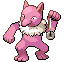

alakazam: <Pokemon: alakazam>
alakazam Weight: 480
Types:  psychic 
Abilities:  synchronize
inner-focus
magic-guard


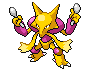

gengar: <Pokemon: gengar>
gengar Weight: 405
Types:  ghost poison 
Abilities:  cursed-body


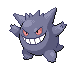

In [17]:
class Pokedex: 
    def __init__(self, username):
        self.username = username
        self.collection = {}
        
    def __repr__(self):
        return f'<Pokedex: {self.username}>'
        
    def build_team(self):
        while True:
            building = input('Are you still building your team? [y]es/[n]o? ').lower()
            if building in 'yes':
                self.add_pokemon()
            elif building in 'no':
                break
    
    def add_pokemon(self):
        pokemon_to_add = input('What pokemon are we adding?  ').lower()
        pokemon = Pokemon(pokemon_to_add)
        if pokemon.abilities:
            self.collection[pokemon.name] = pokemon
        else:
            print('Error; Incorrect pokemon name. Nothing Added')
    
    def remove_pokemon(self):
        pokemon_to_remove = input('What pokemon are you removing? ').lower()
        if pokemon_to_remove in self.collection:
            self.collection.pop(pokemon_to_remove)
        else:
            print('Pokemon not in collection')
            
    def display_collection(self):
        print(f'{self.username}\'s Collection: ')
        for pokemon, poke_instance in self.collection.items():
            print(f'{pokemon}: {self.collection[pokemon]}')
            poke_instance.display_pokemon_info()


pokedex = Pokedex('sean')

pokedex.build_team()
print('\n')
pokedex.display_collection()

In [18]:
print(f'{pokedex.collection =}')

pokedex.collection ={'hypno': <Pokemon: hypno>, 'alakazam': <Pokemon: alakazam>, 'gengar': <Pokemon: gengar>}


## Exercise 1:

### Create a Method prints an image of a random pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [19]:
# Display an image in Jupyter notebook
from IPython.display import Image

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [20]:
random_pokemon = randint(1,898)
random_pokemon

578

WHO'S THAT POKEMON??


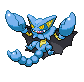

It's gliscor! ...meh, I've seen better.


In [32]:
# recreate your pokemon class here
"""
Exercise 1:
Create a Method that prints an image of a random pokemon
HINT: You may need another attribute as well to store your image url within.
"""
import random
from random import randint
from random import choice #for some reason, it would not let me just import choice, but worked as soon as it was just import random
from requests import get

class Pokemon:
    
    def __init__(self):
        self.name = str(randint(1, 898)) #to generate a random pokemon and have it displayed, set the name to the random int as a string
        self.commentary = random.choice(("So cool!", "Nice!", "Way to go!", "No way?!", "...meh, I've seen better."))
    
    def poke_api_call(self):
        res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if res.ok: #if the request comes back a 200 (alright / good to go!)
            data = res.json() #we give the res(which is a var for accesssing our api), a new var with json conversion
            self.name = data['name'] #name is pulled from the data var (api info)
            self.image=data['sprites']['versions']['generation-v']['black-white']['animated']['front_shiny'] #image is pulled from the data var (api info)
            if not self.image: #in case animated image is not available for the int, an alternative is stated
                self.image = data['sprites']['front_default']
    
    def whos_that_pokemon(self):
        print('WHO\'S THAT POKEMON??')
        pokemon.poke_api_call() #calls the api and images/names connected
        self.display_pokemon_image() #calls up the specific image for the random int pulled
        print(f'It\'s {self.name}! {self.commentary}') #calls up the associated name for that pokemon/image
        
    
    def display_pokemon_image(self, width=150):
        display(Image(self.image, width = width)) #allows image to be displayed while giving display parameters
    
pokemon = Pokemon()
pokemon.whos_that_pokemon()

In [22]:
# Calling our new method
#see above

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

abra


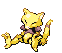

kadabra


<bound method Pokemon.poke_api_call of <__main__.Pokemon object at 0x7fb3d06a1180>>

In [16]:
from random import randint, choice
from requests import get
from IPython.display import Image, display

class Pokemon:

    def __init__(self, name):
#         self.name = randint(1, 150)
        self.name = name
        self.commentary = choice(("So cool!", "Nice!", "Way to go!", "No way?!", "...meh, I've seen better."))
        self.image = ''
        self.poke_api_call()

    def poke_api_call(self):
        res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if res.ok:
            data = res.json()
            self.name = data['species']['name']
            print(self.name) 
            species_url = data['species']['url']
            # print(species_url)  
            self.image = data['sprites']['versions']['generation-v']['black-white']['animated']['front_shiny']
            if not self.image:
                self.image = data['sprites']['front_default'] 
            self.display_pokemon_image(f'{self.image}')
            self.get_evo_chain(species_url)

    def display_pokemon_image(self, width=150):
        display(Image(self.image, width=width))
        
    def get_evo_chain(self, species_url):
        res = get(f'{species_url}')
        if res.ok:
            data = res.json()
            evo_chain_url = data['evolution_chain']['url']
            # print(evo_chain_url)
            self.check_evolution(evo_chain_url)
    
    def check_evolution(self, evo_chain_url):
        res = get(f'{evo_chain_url}')
        if res.ok:
            data = res.json()
            # print('data received')
            try:
                next_evo_name = data['chain']['evolves_to'][0]['species']['name']
                # print(next_evo_name)
                next_evo_url = data['chain']['evolves_to'][0]['species']['url']
                # print(next_evo_url)
                self.evolve(next_evo_url)
            except:
                return 'No further evolutions'
            
    def evolve(self, next_evo_url):
        res = get(f'{next_evo_url}')
        if res.ok:
            data = res.json()
            self.name = data['name']
            print(self.name)


# poke = Pokemon()
# poke.poke_api_call

poke2 = Pokemon("abra")
poke2.poke_api_call

WHO'S THAT POKEMON??


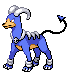

It's houndoom! ...meh, I've seen better.
This Pokémon cannot evolve.


In [128]:
# import random
# from random import randint
# from requests import get
# from IPython.display import Image, display


# random_pokemon = randint(1, 898)

# class Pokemon:
    
#     def __init__(self):
#         self.name = str(randint(1, 898))
#         self.commentary = random.choice(("So cool!", "Nice!", "Way to go!", "No way?!", "...meh, I've seen better."))
#         self.image = ''
#         self.evolves_to = None
    
#     def poke_api_call(self):
#         res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
#         if res.ok:
#             data = res.json()
#             self.name = data['name']
#             self.image = data['sprites']['versions']['generation-v']['black-white']['animated']['front_shiny']
#             if not self.image:
#                 self.image = data['sprites']['front_default']
#             species_url = data['species']['url']
# #             self.get_evolution_chain(species_url)
#             return species_url
    
#     def get_evolution_chain(self, species_url):
#         res = get(species_url)
#         if res.ok:
#             data = res.json()
#             evolution_chain_url = data['evolution_chain']['url']
#             self.parse_evolution_chain(evolution_chain_url)
    
#     def parse_evolution_chain(self, evolution_chain_url):
#         res = get(evolution_chain_url)
#         if res.ok:
#             data = res.json()
#             chain = data['chain']
#             while chain:
#                 species_name = chain['species']['name']
#                 if species_name == self.name:
#                     evolves_to = chain['evolves_to']
#                     if evolves_to:
#                         self.evolves_to = evolves_to[0]['species']['name']
#                     break
#                 chain = chain['evolves_to'][0] 
    
#     def evolve(self):
#         if self.evolves_to:
#             self.name != self.evolves_to
#             self.poke_api_call()
#         else:
#             print("This Pokémon cannot evolve.")
    
#     def whos_that_pokemon(self):
#         print('WHO\'S THAT POKEMON??')
#         pokemon.poke_api_call()
#         self.display_pokemon_image()
#         print(f'It\'s {self.name}! {self.commentary}')
#         self.evolve()
#         if self.evolves_to:
#             choice = input("Do you want to evolve this Pokémon? (yes/no): ").lower()
#             if choice == "yes" or choice =="y":
#                 self.evolve()
#                 self.whos_that_pokemon()
    
#     def display_pokemon_image(self, width=150):
#         display(Image(self.image, width=width))
    

# pokemon = Pokemon()
# pokemon.whos_that_pokemon()

Now let's evolve a few

drowzee


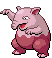

hypno


<bound method Pokemon.poke_api_call of <__main__.Pokemon object at 0x7fb3f06cee60>>

In [19]:
#EVOLUTION OPTION OCCURS FOR EACH RANDOM POKEMON GENERATED. SEE ABOVE FOR EVOLUTION EXECUTION

pikachu = Pokemon("drowzee")
pikachu.poke_api_call

gastly


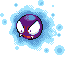

haunter


<bound method Pokemon.poke_api_call of <__main__.Pokemon object at 0x7fb3f06cc220>>

In [20]:
#EVOLUTION OPTION OCCURS FOR EACH RANDOM POKEMON GENERATED. SEE ABOVE FOR EVOLUTION EXECUTION
pikachu = Pokemon("gastly")
pikachu.poke_api_call

abra


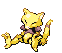

kadabra


<bound method Pokemon.poke_api_call of <__main__.Pokemon object at 0x7fb3f06cc370>>

In [21]:
#EVOLUTION OPTION OCCURS FOR EACH RANDOM POKEMON GENERATED. SEE ABOVE FOR EVOLUTION EXECUTION
pikachu = Pokemon("abra")
pikachu.poke_api_call

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [28]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []
        
    def default_moves(self):
        self.move_list.append("Scratch")
        self.move_list.append("Leer")
        self.move_list.append("Tackle")
        return self.move_list

ditto = Move_Tutor()
ditto.default_moves()

['Scratch', 'Leer', 'Tackle']

In [45]:
from requests import get
from random import choice

class Poke_moves(Move_Tutor):
    
    def __init__(self, name):
        super().__init__()
        self.name = name
        self.unique_moves = []
        

    def get_moves_api(self):
        res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if res.ok:
            data = res.json()
            pokemon_moves = data['moves']
            for move in pokemon_moves:
                move_name = move['move']['name']
                self.unique_moves.append(move_name)

    def teach_move(self):
        if len(self.move_list) < 4:
            learn_move = input(f'{self.name} wants to learn a new move! Do you want {self.name} to learn a new move? [y]/[n] ')
            if learn_move == 'y':
                new_move = choice(self.unique_moves)
                self.move_list.append(new_move)
                self.unique_moves.remove(new_move)
                print(f"Congrats! {self.name} learned {new_move}!")
            elif learn_move == 'n':
                 print(f"Alright, {self,name} did not learn a new move. They know {self.move_list}.")
            else:
                print('Please enter a valid response')
        else:
            replace_move = input(f"{self.name} is trying to learn a new move, but can only know 4. Do you want to forget a move to learn a new one? [y]/[n] ")
            if replace_move == 'y':
                move_to_forget = input(f"Okay, which move do you want to forget? {self.move_list} ")
                if move_to_forget not in self.move_list:
                    print("Please enter a valid move")
                else:
                    self.move_list.remove(move_to_forget)
                    new_move = choice(self.unique_moves)
                    self.move_list.append(new_move)
                    self.unique_moves.remove(new_move)
                    print(f"Congrats! {self.name} forgot {move_to_forget} and learned {new_move}!")
                    self.show_moves()

            elif replace_move == 'n':
                return (f"{self.name} did not learn a new move.")
            else:
                return ('Please enter a valid response')
    
    def continue_learning(self):
        if len(self.move_list) <= 4:
            while True:
                continue_input = input('Do you want to learn more moves? [y]/[n]')
                if continue_input == 'y':
                    self.teach_move()
                elif continue_input == 'n':
                    return (f"{self.name} did not learn a new move.")
                    break
                else:
                    return ('Please enter a valid response')
                    self.continue_learning()
    
    def show_moves(self):
        print(f"{self.name} knows: {self.move_list}")

squirtle = Poke_moves("squirtle")
squirtle.default_moves() 
squirtle.get_moves_api()
squirtle.continue_learning()
squirtle.show_moves()


Do you want to learn more moves? [y]/[n]y
squirtle wants to learn a new move! Do you want squirtle to learn a new move? [y]/[n] y
Congrats! squirtle learned focus-punch!
Do you want to learn more moves? [y]/[n]y
squirtle is trying to learn a new move, but can only know 4. Do you want to forget a move to learn a new one? [y]/[n] y
Okay, which move do you want to forget? ['Scratch', 'Leer', 'Tackle', 'focus-punch'] 'Leer'
Please enter a valid move
Do you want to learn more moves? [y]/[n]y
squirtle is trying to learn a new move, but can only know 4. Do you want to forget a move to learn a new one? [y]/[n] y
Okay, which move do you want to forget? ['Scratch', 'Leer', 'Tackle', 'focus-punch'] Leer
Congrats! squirtle forgot Leer and learned foresight!
squirtle knows: ['Scratch', 'Tackle', 'focus-punch', 'foresight']
Do you want to learn more moves? [y]/[n]y
squirtle is trying to learn a new move, but can only know 4. Do you want to forget a move to learn a new one? [y]/[n] y
Okay, which move

In [ ]:
pikachu = Poke_moves("pikachu")
pikachu.default_moves() 
pikachu.get_moves_api()
pikachu.continue_learning()
pikachu.show_moves()

Do you want to learn more moves? [y]/[n]y
pikachu wants to learn a new move! Do you want pikachu to learn a new move? [y]/[n] y
Congrats! pikachu learned trailblaze!
Do you want to learn more moves? [y]/[n]y
pikachu is trying to learn a new move, but can only know 4. Do you want to forget a move to learn a new one? [y]/[n] y
Okay, which move do you want to forget? ['Scratch', 'Leer', 'Tackle', 'trailblaze'] Leer
Congrats! pikachu forgot Leer and learned double-edge!
pikachu knows: ['Scratch', 'Tackle', 'trailblaze', 'double-edge']
Do you want to learn more moves? [y]/[n]y
pikachu is trying to learn a new move, but can only know 4. Do you want to forget a move to learn a new one? [y]/[n] y
Okay, which move do you want to forget? ['Scratch', 'Tackle', 'trailblaze', 'double-edge'] Scratch
Congrats! pikachu forgot Scratch and learned signal-beam!
pikachu knows: ['Tackle', 'trailblaze', 'double-edge', 'signal-beam']
